In [2]:
!pip install pandas matplotlib seaborn


In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set styles for better plots
#plt.style.use('seaborn-darkgrid')
sns.set()

# Load the dataset (since you've uploaded it to Colab)
df = pd.read_csv("/content/electricityConsumptionAndProductioction.csv")

# Convert DateTime column to datetime object
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

# Show first few rows
df.head()


,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


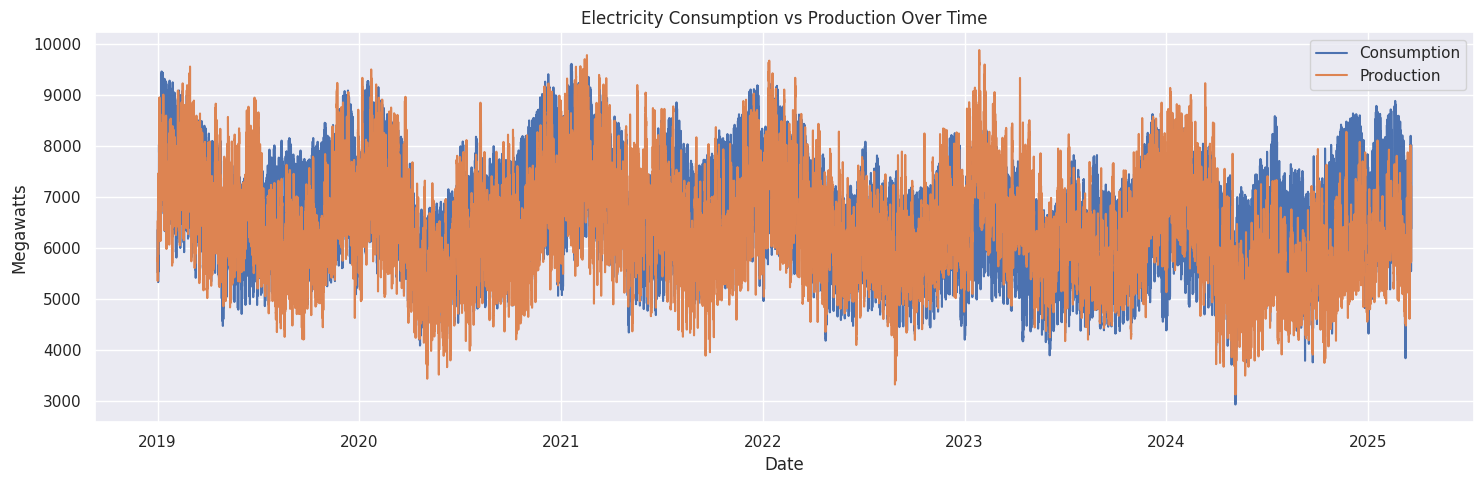

In [5]:
plt.figure(figsize=(15, 5))
plt.plot(df['Consumption'], label='Consumption')
plt.plot(df['Production'], label='Production')
plt.title('Electricity Consumption vs Production Over Time')
plt.xlabel('Date')
plt.ylabel('Megawatts')
plt.legend()
plt.tight_layout()
plt.show()


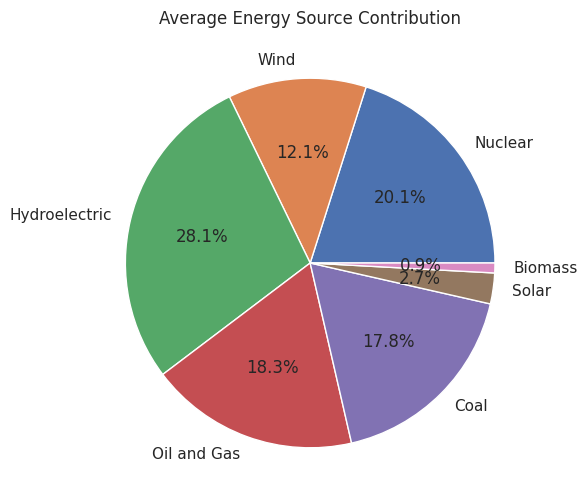

In [6]:
energy_sources = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']
avg_contribution = df[energy_sources].mean()

plt.figure(figsize=(10, 6))
avg_contribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Average Energy Source Contribution')
plt.ylabel('')
plt.show()


<ipython-input-7-358326943>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df['Consumption'].resample('M').mean()


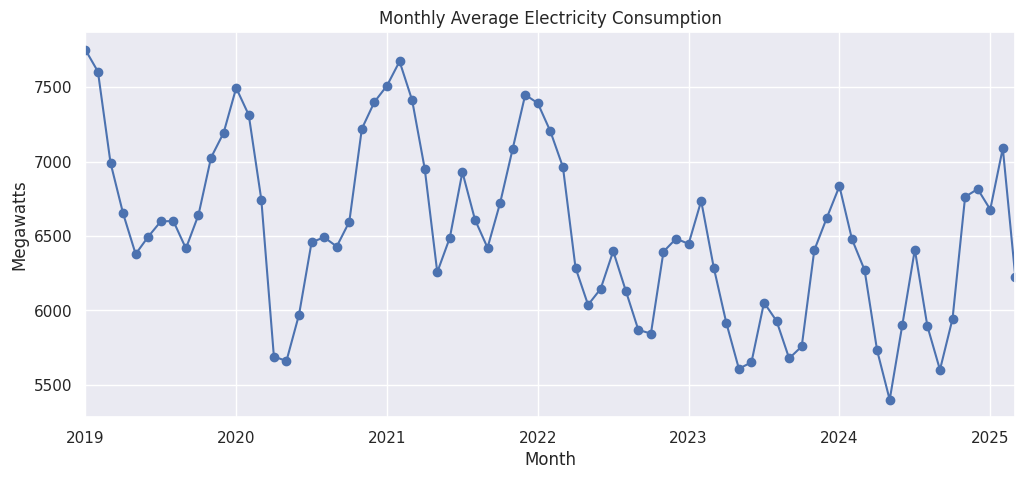

In [7]:
monthly = df['Consumption'].resample('M').mean()

plt.figure(figsize=(12, 5))
monthly.plot(marker='o')
plt.title('Monthly Average Electricity Consumption')
plt.xlabel('Month')
plt.ylabel('Megawatts')
plt.show()


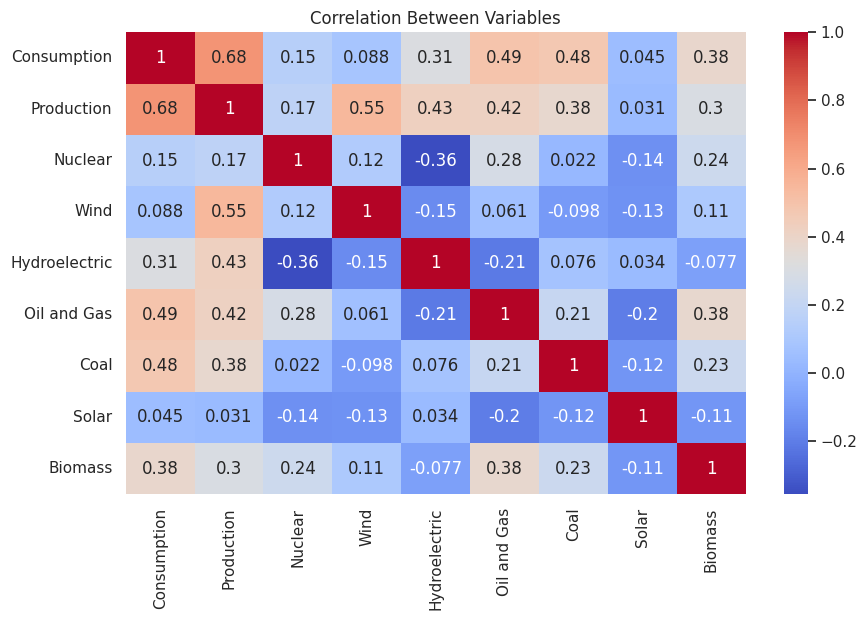

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Variables')
plt.show()


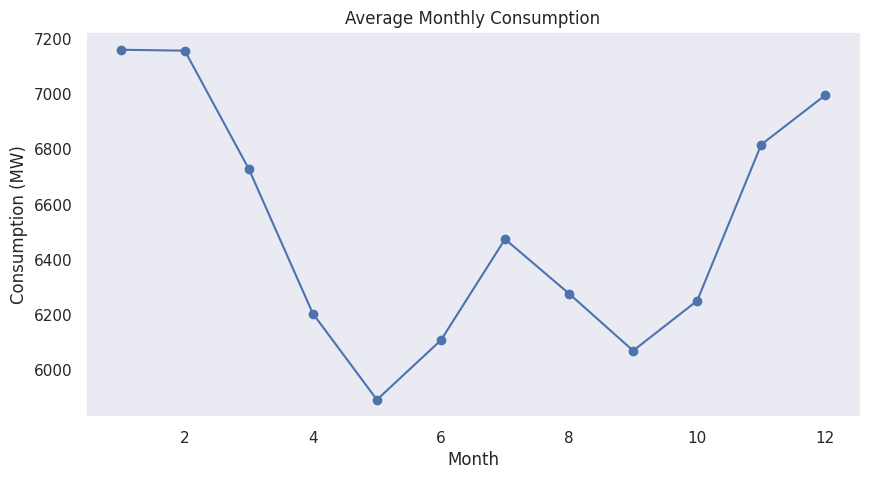

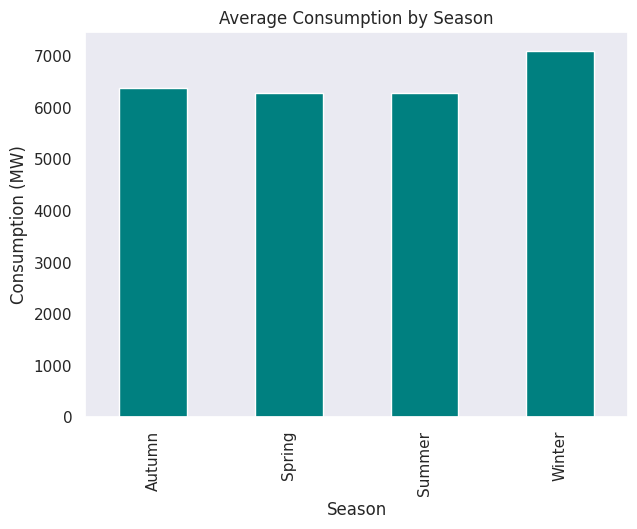

In [9]:
# ========================
# SEASONAL ANALYSIS
# ========================

# Extract month and season
df['Month'] = df.index.month
df['Year'] = df.index.year

# Monthly average consumption
monthly = df.groupby('Month')['Consumption'].mean()

plt.figure(figsize=(10,5))
monthly.plot(marker='o')
plt.title('Average Monthly Consumption')
plt.xlabel('Month')
plt.ylabel('Consumption (MW)')
plt.grid()
plt.show()

# Seasonal (Winter, Spring, Summer, Autumn)
def season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(season)
seasonal = df.groupby('Season')['Consumption'].mean()

plt.figure(figsize=(7,5))
seasonal.plot(kind='bar', color='teal')
plt.title('Average Consumption by Season')
plt.ylabel('Consumption (MW)')
plt.grid()
plt.show()

In [11]:
# ========================
# MINI REPORT GENERATION
# ========================

print("==== MINI REPORT ====")
print(f"Total Records: {len(df)}")
print(f"Data Range: {df.index.min()} to {df.index.max()}")

print("\n--- Overall Statistics ---")
print(df[['Consumption', 'Production']].describe())

==== MINI REPORT ====
Total Records: 54170
Data Range: 2019-01-01 00:00:00 to 2025-03-19 23:00:00

--- Overall Statistics ---
        Consumption    Production
count  54170.000000  54170.000000
mean    6526.463688   6380.179989
std     1048.248455   1015.393399
min     2922.000000   3119.000000
25%     5710.000000   5639.000000
50%     6474.000000   6322.000000
75%     7268.000000   7057.750000
max     9615.000000   9886.000000


In [12]:
# Max consumption day
max_consumption_day = df['Consumption'].idxmax()
print(f"\nMax consumption occurred on: {max_consumption_day.date()} with {df['Consumption'].max()} MW")


Max consumption occurred on: 2021-01-19 with 9615 MW
